<a href="https://colab.research.google.com/github/shahpranshu27/ML_EDA_Practice/blob/main/Insurance.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Dataset taken from

https://github.com/stedy/Machine-Learning-with-R-datasets/blob/master/insurance.csv

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import plotly.express as px
import seaborn as sns
import matplotlib
%matplotlib inline

In [2]:
df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/insurance.csv')

In [3]:
df

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830
1334,18,female,31.920,0,no,northeast,2205.98080
1335,18,female,36.850,0,no,southeast,1629.83350
1336,21,female,25.800,0,no,southwest,2007.94500


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [5]:
df.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


The following settings will improve the default style and font size of the charts and graphs

In [6]:
sns.set_style('darkgrid')
matplotlib.rcParams['font.size'] = 14
matplotlib.rcParams['figure.figsize'] = (10,6)
matplotlib.rcParams['figure.facecolor'] = '#000000'

## **Age**
Age is a numeric column, with min age = 18, and max age = 64, thus we can visualize the distribution of age using histogram with 47 bins (one for each year) and a box plot.

In [7]:
df.age.describe()

count    1338.000000
mean       39.207025
std        14.049960
min        18.000000
25%        27.000000
50%        39.000000
75%        51.000000
max        64.000000
Name: age, dtype: float64

In [8]:
fig = px.histogram(df, x='age', marginal='box', nbins=47, title='Distribution of age')
fig.update_layout(bargap=0.1)
fig.show()

The distribution of ages in the dataset are almost uniform, with 20-30 customers of every ages, except for age 18 and 19.

## **Body Mass Index (BMI)**

In [10]:
fig = px.histogram(df, x='bmi', marginal='box', color_discrete_sequence=['red'], title='Distribution of BMI')
fig.update_layout(bargap=0.1)
fig.show()

## **Charges**

This is the column we are trying to predict. Let's use columns 'smokers' to distinguish charges for 'smokers' and 'non-smokers'.

In [12]:
fig = px.histogram(df, x='charges', color='smoker', marginal='box', color_discrete_sequence=['green', 'grey'], title="Annual medical charges")
fig.update_layout(bargap=0.1)
fig.show()

In [15]:
fig = px.histogram(df, x='charges', color='sex', marginal='box', color_discrete_sequence=["blue","cyan"])
fig.update_layout(bargap=0.1)
fig.show()

We can conclude that the median charges of male and female are approx same

In [17]:
fig = px.histogram(df, x='charges', color='region', marginal='box', color_discrete_sequence=["brown", "pink", "orange", "yellow"])
fig.update_layout(bargap=0.1)
fig.show()

This is graph for the region wise charges

## **Smoker**

In [19]:
df.smoker.value_counts()

smoker
no     1064
yes     274
Name: count, dtype: int64

In [20]:
# sex wise count of smokers
px.histogram(df, x='smoker', color='sex', title="Smoker")

In [24]:
# region wise count of smokers
px.histogram(df, x='smoker', color='region', title="Smokers in different regions")

In [22]:
px.histogram(df, x='smoker', color='children', title="count of children of smokers")

## Age and Charges

Let's visualize the relation between age and charges, using scatter plot. Each point in scatter plot, represents one customer.

In [23]:
fig = px.scatter(df, x='age', y='charges', color='smoker', opacity=0.8, hover_data=["sex"], title="Age vs  Charges")
fig.update_traces(marker_size=5)
fig.show()

We can observe that the medical charges increase as the age increases, in most cases. But as we can see, age alone can't be used to determine the medical charges.

## **Bmi and Charges**

In [26]:
fig = px.scatter(df, x='bmi', y='charges', color='smoker', opacity=0.7, hover_data=['sex'], title='BMI vs Charges')
fig.update_traces(marker_size=5)
fig.show()

For non-smokers, the bmi field doesn't seem to be quite related to increase in the charges, as the charges at any bmi are almsot same for non-smokers.

However, for the smokers' with bmi>30, there's a drastic increase in the medical expenses.

In [33]:
fig = px.histogram(df, x='region', y='charges', color='smoker', title='Region vs Charges')
fig.update_layout(bargap=0.1)
fig.show()

In [39]:
fig = px.violin(df, x='children', y='charges', title='children vs Charges')
fig.show()

## **Correlation**

In [40]:
df.charges.corr(df.age)

0.2990081933306476

In [41]:
df.charges.corr(df.bmi)

0.19834096883362895

In [46]:
smoker_values = {'no':0, 'yes':1}
smoker_numeric = df.smoker.map(smoker_values)
smoker_numeric

0       1
1       0
2       0
3       0
4       0
       ..
1333    0
1334    0
1335    0
1336    0
1337    1
Name: smoker, Length: 1338, dtype: int64

In [47]:
df.charges.corr(smoker_numeric)

0.787251430498478

In [57]:
df.select_dtypes(include=[np.number]).corr()

,age,bmi,children,charges
age,1.000000,0.109272,0.042469,0.299008
bmi,0.109272,1.000000,0.012759,0.198341
children,0.042469,0.012759,1.000000,0.067998
charges,0.299008,0.198341,0.067998,1.000000


Text(0.5, 1.0, 'correlation matrix')

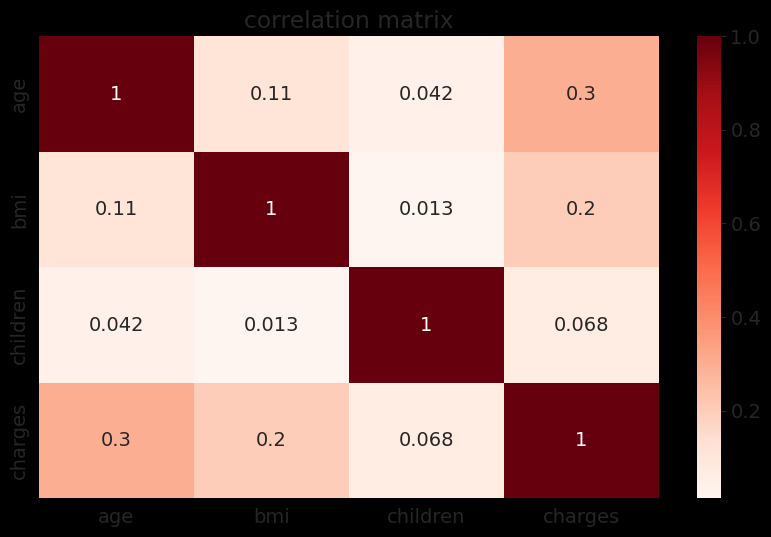

In [59]:
sns.heatmap(df.select_dtypes(include=[np.number]).corr(), cmap="Reds", annot=True)
plt.title("correlation matrix")